In [1]:
import torch
import numpy as np

In [2]:
torch.cuda.is_available()

True

In [9]:
torch.zeros(3, 3, 3, 3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

In [10]:
torch.rand(1, 3)

tensor([[0.3559, 0.5308, 0.0701]])

In [22]:
t = torch.rand(3, 5, 3)
t, torch.transpose(t, 2, 1)

(tensor([[[0.7732, 0.2951, 0.4686],
          [0.8109, 0.8221, 0.6691],
          [0.9015, 0.1223, 0.8262],
          [0.7856, 0.8013, 0.9968],
          [0.9018, 0.7879, 0.6493]],
 
         [[0.5181, 0.5502, 0.1186],
          [0.3773, 0.1689, 0.9732],
          [0.2182, 0.5006, 0.2335],
          [0.2264, 0.0810, 0.5035],
          [0.8956, 0.4541, 0.8828]],
 
         [[0.4845, 0.4891, 0.2726],
          [0.9002, 0.1640, 0.7906],
          [0.1887, 0.9630, 0.8653],
          [0.1928, 0.7283, 0.0878],
          [0.8104, 0.7154, 0.3094]]]),
 tensor([[[0.7732, 0.8109, 0.9015, 0.7856, 0.9018],
          [0.2951, 0.8221, 0.1223, 0.8013, 0.7879],
          [0.4686, 0.6691, 0.8262, 0.9968, 0.6493]],
 
         [[0.5181, 0.3773, 0.2182, 0.2264, 0.8956],
          [0.5502, 0.1689, 0.5006, 0.0810, 0.4541],
          [0.1186, 0.9732, 0.2335, 0.5035, 0.8828]],
 
         [[0.4845, 0.9002, 0.1887, 0.1928, 0.8104],
          [0.4891, 0.1640, 0.9630, 0.7283, 0.7154],
          [0.2726, 0.7906, 0.

In [24]:
t, torch.transpose(t, 1, 2)

(tensor([[[0.7732, 0.2951, 0.4686],
          [0.8109, 0.8221, 0.6691],
          [0.9015, 0.1223, 0.8262],
          [0.7856, 0.8013, 0.9968],
          [0.9018, 0.7879, 0.6493]],
 
         [[0.5181, 0.5502, 0.1186],
          [0.3773, 0.1689, 0.9732],
          [0.2182, 0.5006, 0.2335],
          [0.2264, 0.0810, 0.5035],
          [0.8956, 0.4541, 0.8828]],
 
         [[0.4845, 0.4891, 0.2726],
          [0.9002, 0.1640, 0.7906],
          [0.1887, 0.9630, 0.8653],
          [0.1928, 0.7283, 0.0878],
          [0.8104, 0.7154, 0.3094]]]),
 tensor([[[0.7732, 0.8109, 0.9015, 0.7856, 0.9018],
          [0.2951, 0.8221, 0.1223, 0.8013, 0.7879],
          [0.4686, 0.6691, 0.8262, 0.9968, 0.6493]],
 
         [[0.5181, 0.3773, 0.2182, 0.2264, 0.8956],
          [0.5502, 0.1689, 0.5006, 0.0810, 0.4541],
          [0.1186, 0.9732, 0.2335, 0.5035, 0.8828]],
 
         [[0.4845, 0.9002, 0.1887, 0.1928, 0.8104],
          [0.4891, 0.1640, 0.9630, 0.7283, 0.7154],
          [0.2726, 0.7906, 0.

In [26]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

In [27]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [31]:
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [32]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [33]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 74.8602
Epoch 10 Loss 2.0856
Epoch 20 Loss 19.9414
Epoch 30 Loss 4.0696
Epoch 40 Loss 13.9829
Epoch 50 Loss 9.1008
Epoch 60 Loss 0.0426
Epoch 70 Loss 3.7788
Epoch 80 Loss 1.7432
Epoch 90 Loss 3.0126
Epoch 100 Loss 0.0130
Epoch 110 Loss 0.8020
Epoch 120 Loss 0.1341
Epoch 130 Loss 0.0962
Epoch 140 Loss 0.1119
Epoch 150 Loss 0.1043
Epoch 160 Loss 0.4628
Epoch 170 Loss 0.1751
Epoch 180 Loss 0.3853
Epoch 190 Loss 0.3587


In [36]:
print(f'Final Params: {weight.item():.4f}x + {bias.item():.4f}')

Final Params: 2.6632x + 4.8826


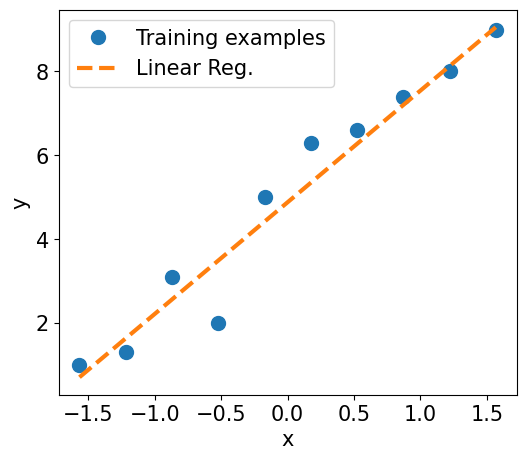

In [39]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [40]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [41]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 99.8429
Epoch 10 Loss 17.2796
Epoch 20 Loss 28.7130
Epoch 30 Loss 15.4599
Epoch 40 Loss 0.0555
Epoch 50 Loss 12.4794
Epoch 60 Loss 8.1365
Epoch 70 Loss 1.0559
Epoch 80 Loss 0.0657
Epoch 90 Loss 1.4861
Epoch 100 Loss 0.9002
Epoch 110 Loss 0.5332
Epoch 120 Loss 0.6184
Epoch 130 Loss 0.2930
Epoch 140 Loss 0.1636
Epoch 150 Loss 0.5232
Epoch 160 Loss 0.4667
Epoch 170 Loss 0.0009
Epoch 180 Loss 0.1599
Epoch 190 Loss 0.3617


In [49]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)


In [50]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [51]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return X

In [52]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [53]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [56]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

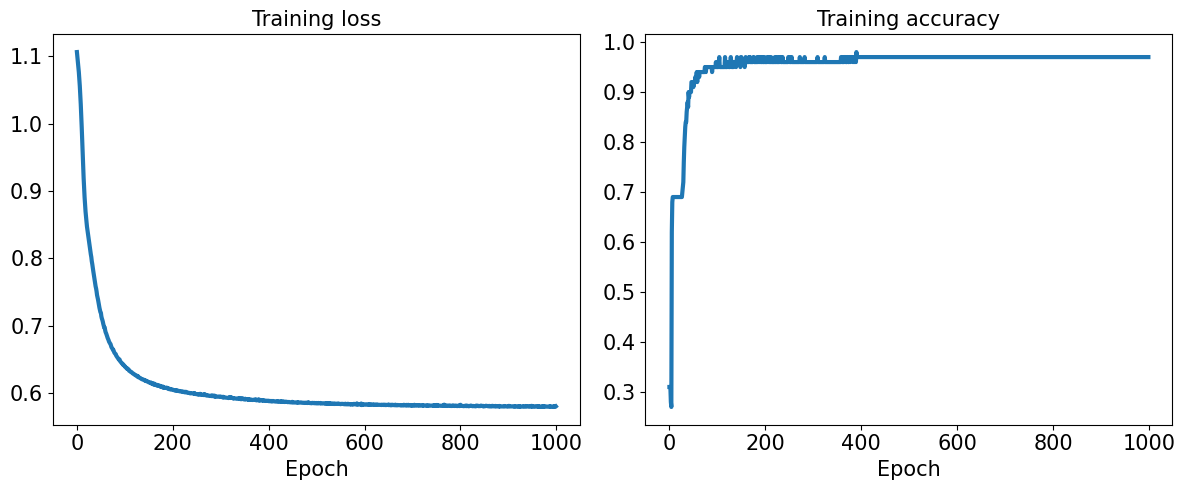

In [57]:

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)





X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)




class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)




num_epochs = 1000
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)




fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [58]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


In [62]:
import sys
import os
import pycuber as pc
from pycuber.solver import CFOPSolver

c = pc.Cube()
alg = pc.Formula()
random_alg = alg.random()
print(random_alg)
c(random_alg)
print(c)

solver = CFOPSolver(c)

solution = solver.solve(suppress_progress_messages=True)

print(solution)

U' L2 D F2 L2 U' B2 D2 L2 B2 D L' F2 U R2 D' B2 U2 L2 F R' U L2 F D2
         [r][w][b]
         [y][y][y]
         [b][r][b]
[y][g][r][y][b][o][w][b][w][r][b][g]
[y][r][r][g][g][g][w][o][r][w][b][r]
[o][g][g][w][o][y][o][w][y][b][y][g]
         [r][b][g]
         [o][w][o]
         [w][o][o]

F R' B2 U D F2 B D' U L U2 L' F' U' F U' B U2 B' R' U2 R U R' U2 R U F U' F' U2 L U' L' U L' U L U F U' F' U' F' L' F B' U' B U F' L F U L' B L' F2 L B' L' F2 L2


In [60]:
len(solution.split())

AttributeError: 'Formula' object has no attribute 'split'